# IBM HR Analytics Employee Attrition & Performance

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv'); df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.select_dtypes('O').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

## Data Explore

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Encoding

In [7]:
print('Business travel:',df['BusinessTravel'].unique())
print('Department:',df['Department'].unique())
print('Education feild:',df['EducationField'].unique())
print('Gender:',df['Gender'].unique())
print('over 18:', df['Over18'].unique())
print('over time:', df['OverTime'].unique())

Business travel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
Education feild: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
over 18: ['Y']
over time: ['Yes' 'No']


In [8]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
for i in df.select_dtypes('O').columns:
      df[i] = df[i].astype('category').cat.codes

In [10]:
df['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


In [11]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# df['Attrition']= label_encoder.fit_transform(df['Attrition'])
# df['Attrition'].unique()

In [12]:
# df['BusinessTravel'] = df['BusinessTravel'].astype('category').cat.codes
# df['Department'] = df['Department'].astype('category').cat.codes
# df['EducationField'] = df['EducationField'].astype('category').cat.codes
# df['Gender'] = df['Gender'].astype('category').cat.codes

In [13]:
print('Business travel:',df['BusinessTravel'].unique())
print('Department:',df['Department'].unique())
print('Education feild:',df['EducationField'].unique())
print('Gender:',df['Gender'].unique())

Business travel: [2 1 0]
Department: [2 1 0]
Education feild: [1 4 3 2 5 0]
Gender: [0 1]


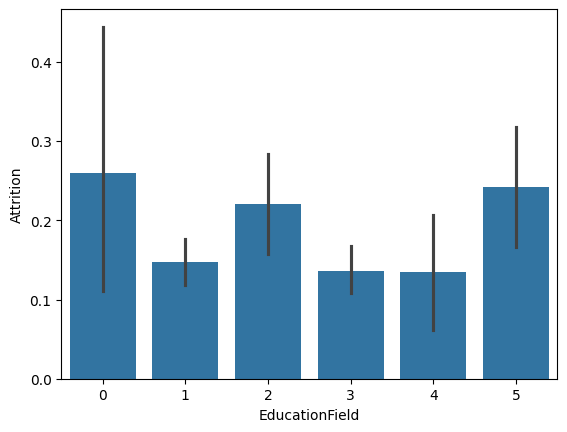

In [14]:
a = df['EducationField']
b = df['Attrition']
c = sns.barplot(x=a, y=b, data=df)

<Axes: xlabel='JobLevel', ylabel='Attrition'>

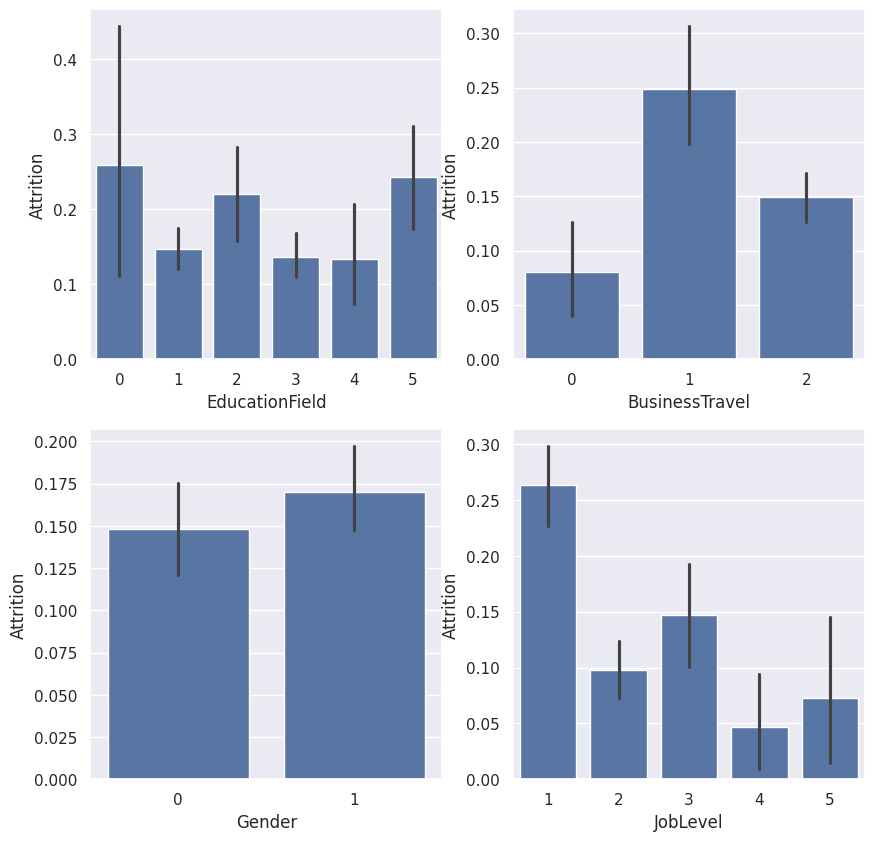

In [15]:
sns.set()
f, axes = plt.subplots(2, 2,figsize =(10, 10))

sns.barplot(data=df, x = df['EducationField'],y= df['Attrition'], ax=axes[0,0])
sns.barplot(data=df, x = df['BusinessTravel'],y = df['Attrition'], ax=axes[0,1])
sns.barplot(data=df, x= df['Gender'],y = df['Attrition'], ax=axes[1,0])
sns.barplot(data=df, x =df['JobLevel'], y= df['Attrition'], ax=axes[1,1])

<Axes: xlabel='OverTime', ylabel='Attrition'>

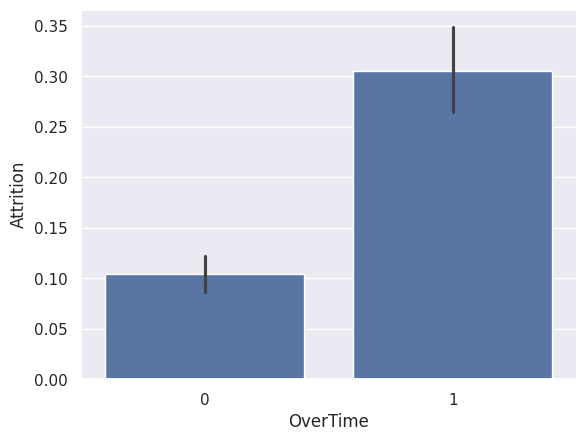

In [16]:
sns.barplot(data=df, x =df['OverTime'], y= df['Attrition'])

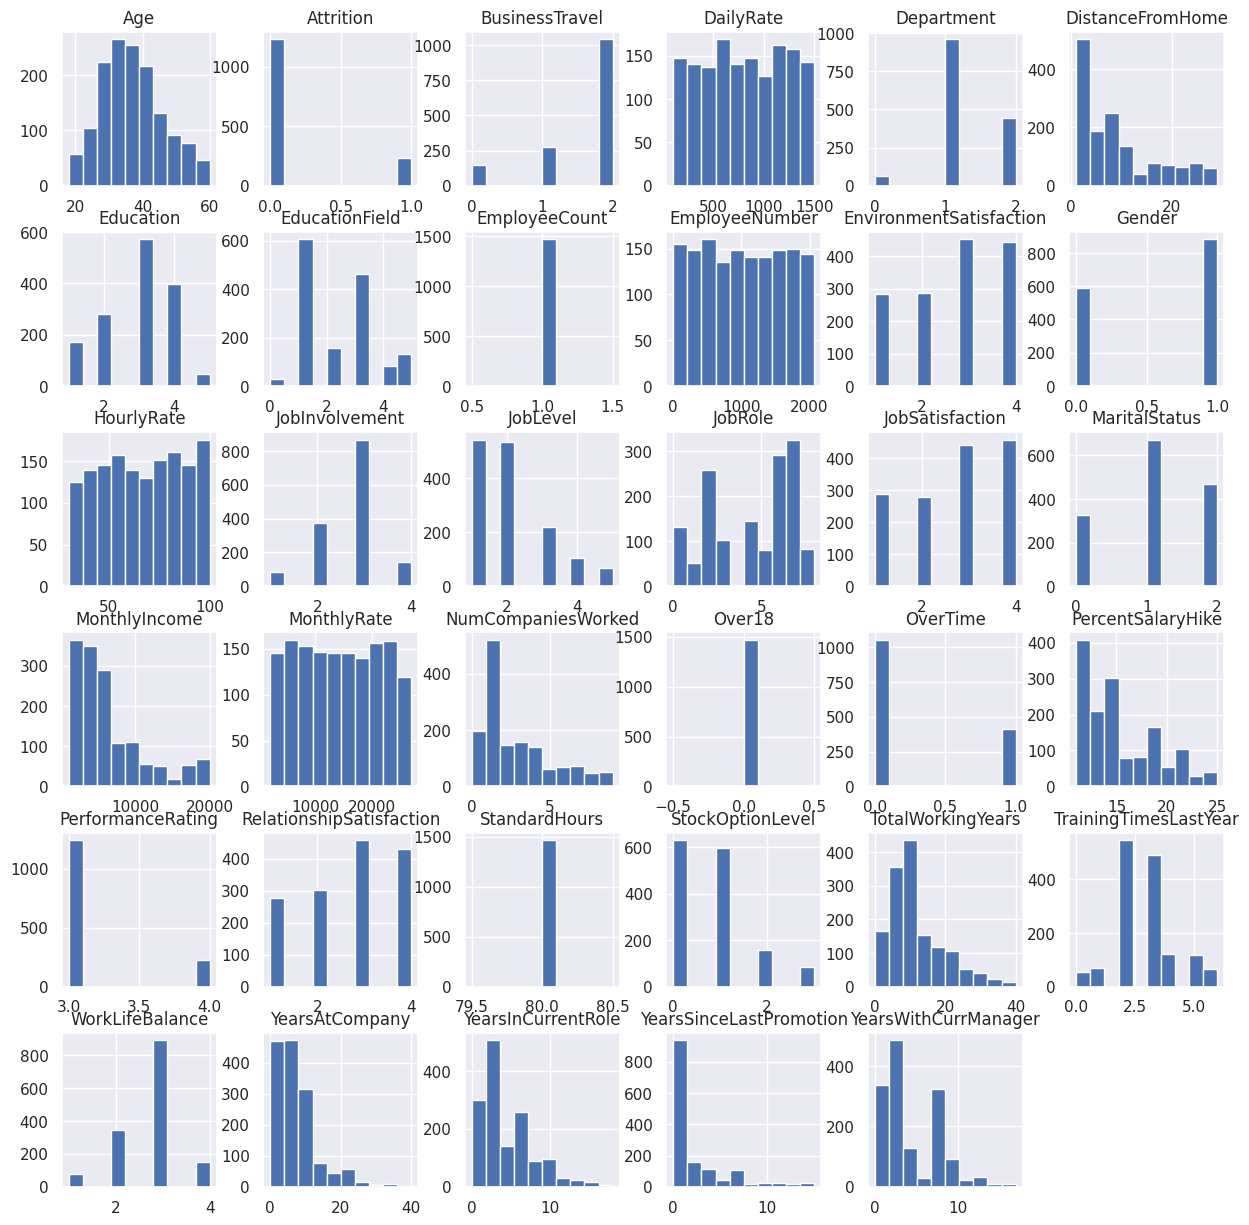

In [17]:
p = df.hist(figsize = (15,15))

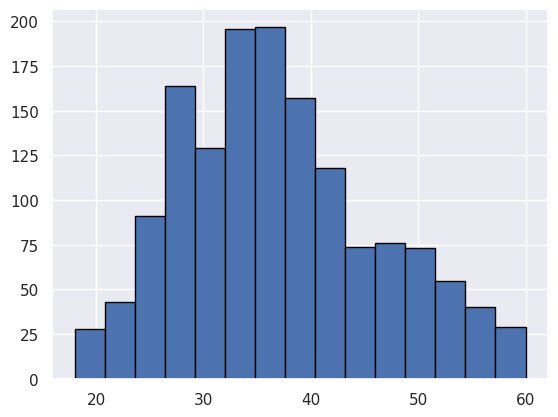

In [18]:
plt.hist(df['Age'], bins=15, edgecolor='black')
plt.show()

## Spliting

In [19]:
x = df.drop('Attrition', axis = 1)
y = df['Attrition']

In [20]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [21]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1176, 34), (294, 34), (1176,), (294,))

In [24]:
y_train.value_counts(), y_test.value_counts()

(Attrition
 0    981
 1    195
 Name: count, dtype: int64,
 Attrition
 0    252
 1     42
 Name: count, dtype: int64)

## Feature Importance

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(100)
clf.fit(x_train, y_train)
clf.score(x_train, y_train),clf.score(x_test, y_test)

(1.0, 0.8741496598639455)

In [26]:
clf.feature_importances_


array([0.06181757, 0.01342904, 0.05402185, 0.01283624, 0.04566303,
       0.01778947, 0.02082631, 0.        , 0.04601711, 0.03014201,
       0.00833198, 0.0471914 , 0.02435914, 0.01857773, 0.03114871,
       0.02824325, 0.02014541, 0.07373089, 0.04865427, 0.03154111,
       0.        , 0.04904302, 0.03277498, 0.00543449, 0.02140424,
       0.        , 0.03015733, 0.05352958, 0.02310939, 0.02344389,
       0.04023053, 0.02941924, 0.02758523, 0.02940157])

In [27]:
feature_importance = pd.DataFrame({'importance': clf.feature_importances_}, index= x.columns).sort_values('importance', ascending = False)

In [28]:
feature_importance

,importance
MonthlyIncome,0.073731
Age,0.061818
DailyRate,0.054022
TotalWorkingYears,0.053530
OverTime,0.049043
MonthlyRate,0.048654
HourlyRate,0.047191
EmployeeNumber,0.046017
DistanceFromHome,0.045663
YearsAtCompany,0.040231


<Axes: >

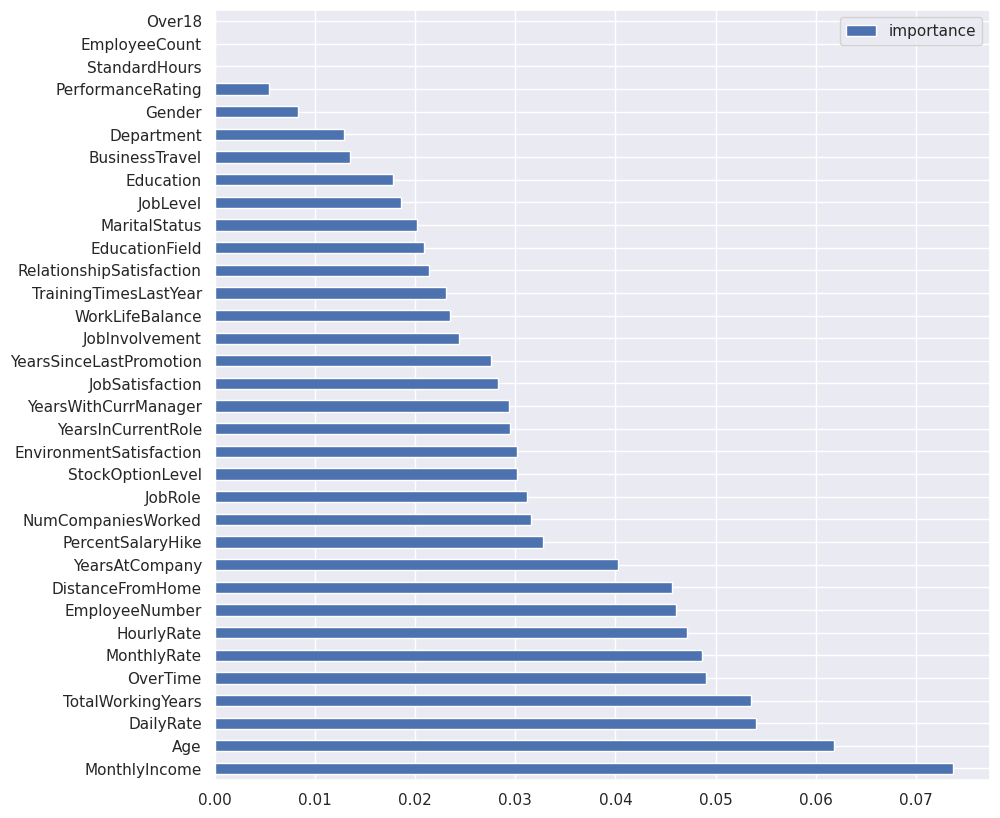

In [29]:
feature_importance.plot.barh(figsize = (10,10))

In [30]:
x1 = df[feature_importance[feature_importance['importance'] > 0.030].index]

In [31]:
x1

,MonthlyIncome,Age,DailyRate,TotalWorkingYears,OverTime,MonthlyRate,HourlyRate,EmployeeNumber,DistanceFromHome,YearsAtCompany,PercentSalaryHike,NumCompaniesWorked,JobRole,StockOptionLevel,EnvironmentSatisfaction
0,5993,41,1102,8,1,19479,94,1,1,6,11,8,7,0,2
1,5130,49,279,10,0,24907,61,2,8,10,23,1,6,1,3
2,2090,37,1373,7,1,2396,92,4,2,0,15,6,2,0,4
3,2909,33,1392,8,1,23159,56,5,3,8,11,1,6,0,4
4,3468,27,591,6,0,16632,40,7,2,2,12,9,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2571,36,884,17,0,12290,41,2061,23,5,17,4,2,1,3
1466,9991,39,613,9,0,21457,42,2062,6,7,15,4,0,1,4
1467,6142,27,155,6,1,5174,87,2064,4,6,20,1,4,1,2
1468,5390,49,1023,17,0,13243,63,2065,2,9,14,2,7,0,4


## Modeling

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [33]:
knn = KNeighborsClassifier(n_neighbors=13, metric='manhattan')
svc = SVC(kernel='rbf', C=1E6)
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
rf = RandomForestClassifier(100)
nb = GaussianNB()

In [34]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y, test_size = 0.2)

In [35]:
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape


((1176, 15), (294, 15), (1176,), (294,))

In [36]:
rf_param = {"max_depth": np.arange(5,15,5),
              "max_features": [5, 10, 13],
              "min_samples_split": [10, 20, 50],
              "criterion": ["gini", "entropy"]}

In [37]:
from sklearn.model_selection import GridSearchCV
rf = GridSearchCV(rf, param_grid=rf_param, cv=5)
rf.fit(x_train1, y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5, 10]),
                         'max_features': [5, 10, 13],
                         'min_samples_split': [10, 20, 50]})

In [38]:
rf.score(x_train1, y_train1),rf.score(x_test1, y_test1)

(0.9336734693877551, 0.8537414965986394)

In [39]:
knn_param = {
    'n_neighbors' : np.arange(5,15,5),
    'metric' : ['minkowski', 'manhattan', 'euclidean']}

In [40]:
knn = GridSearchCV(knn, param_grid=knn_param, cv=5)
knn.fit(x_train1, y_train1)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=13),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': array([ 5, 10])})

In [41]:
knn.score(x_train1, y_train1),knn.score(x_test1, y_test1)

(0.8435374149659864, 0.8299319727891157)

In [42]:
dt = GridSearchCV(dt, param_grid=rf_param, cv=5)
dt.fit(x_train1, y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5, 10]),
                         'max_features': [5, 10, 13],
                         'min_samples_split': [10, 20, 50]})

In [43]:
dt.score(x_train1, y_train1),dt.score(x_test1, y_test1)

(0.8767006802721088, 0.7925170068027211)

In [44]:
nb.fit(x_train1, y_train1)

GaussianNB()

In [45]:
nb.score(x_train1, y_train1),nb.score(x_test1, y_test1)

(0.8528911564625851, 0.8537414965986394)

## Predicting

In [46]:
y_pred = rf.predict(x_test1)

In [47]:
y_pred.shape, y_test1.shape

((294,), (294,))

In [48]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int8)

## Model Score

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
accuracy_score(y_test1, y_pred)

0.8537414965986394